In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
sns.set_style("whitegrid")

In [6]:
df = pd.read_csv("german_credit_data.csv")

In [7]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [8]:
df["Age"].describe()

,Age
count,1000.000000
mean,35.546000
std,11.375469
min,19.000000
25%,27.000000
50%,33.000000
75%,42.000000
max,75.000000


In [9]:
df["Risk"].value_counts()

,count
Risk,
good,700
bad,300


In [10]:
df.shape

(1000, 11)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [12]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df["Job"].unique()

array([2, 1, 3, 0])

In [15]:
df.isna().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,183
Checking account,394
Credit amount,0
Duration,0
Purpose,0


In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.dropna().reset_index(drop=True)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,4,53,male,2,free,little,little,4870,24,car,bad
3,7,35,male,3,rent,little,moderate,6948,36,car,good
4,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
517,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,996,40,male,3,own,little,little,3857,30,car,good
520,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [18]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

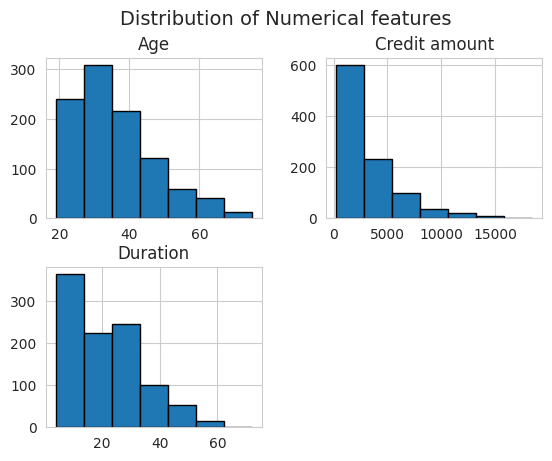

In [21]:
df[["Age", "Credit amount", "Duration"]].hist(bins=7, edgecolor="black")
plt.suptitle("Distribution of Numerical features", fontsize=14)
plt.show()

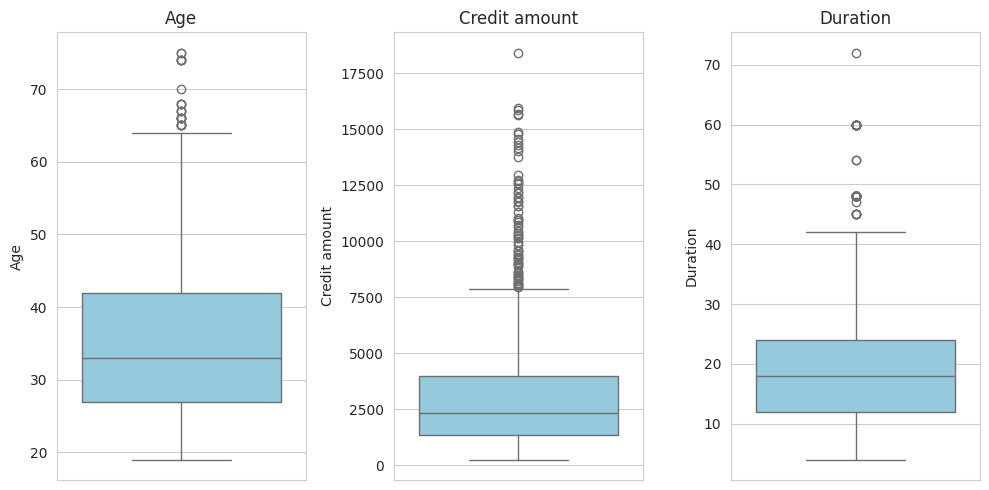

In [23]:
plt.figure(figsize=(10, 5))
for i, col in enumerate (["Age", "Credit amount", "Duration"]):
  plt.subplot(1, 3, i+1)
  sns.boxplot(y=df[col], color="skyblue")
  plt.title(col)

plt.tight_layout()
plt.show()

In [25]:
df.query("Duration>=60")

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
29,29,63,male,2,own,little,little,6836,60,business,bad
134,134,21,female,2,own,moderate,NaN,10144,60,radio/TV,good
255,255,27,male,1,own,NaN,moderate,7418,60,radio/TV,good
332,332,24,female,3,own,moderate,moderate,7408,60,car,bad
373,373,63,male,3,free,NaN,NaN,13756,60,car,good
374,374,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
616,616,27,male,3,free,NaN,moderate,9157,60,radio/TV,good
637,637,21,male,2,own,little,NaN,15653,60,radio/TV,good
672,672,42,male,3,own,little,NaN,10366,60,car,good
677,677,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad


In [33]:
categorical_cols=["Sex", "Job", "Housing", "Saving accounts", "Checking account", "Purpose"]

/tmp/ipython-input-163/3159952996.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)
/tmp/ipython-input-163/3159952996.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)
/tmp/ipython-input-163/3159952996.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)
/tmp/ipython-input-163/3159952996.py:4: FutureWarning: 

Passing `palette` with

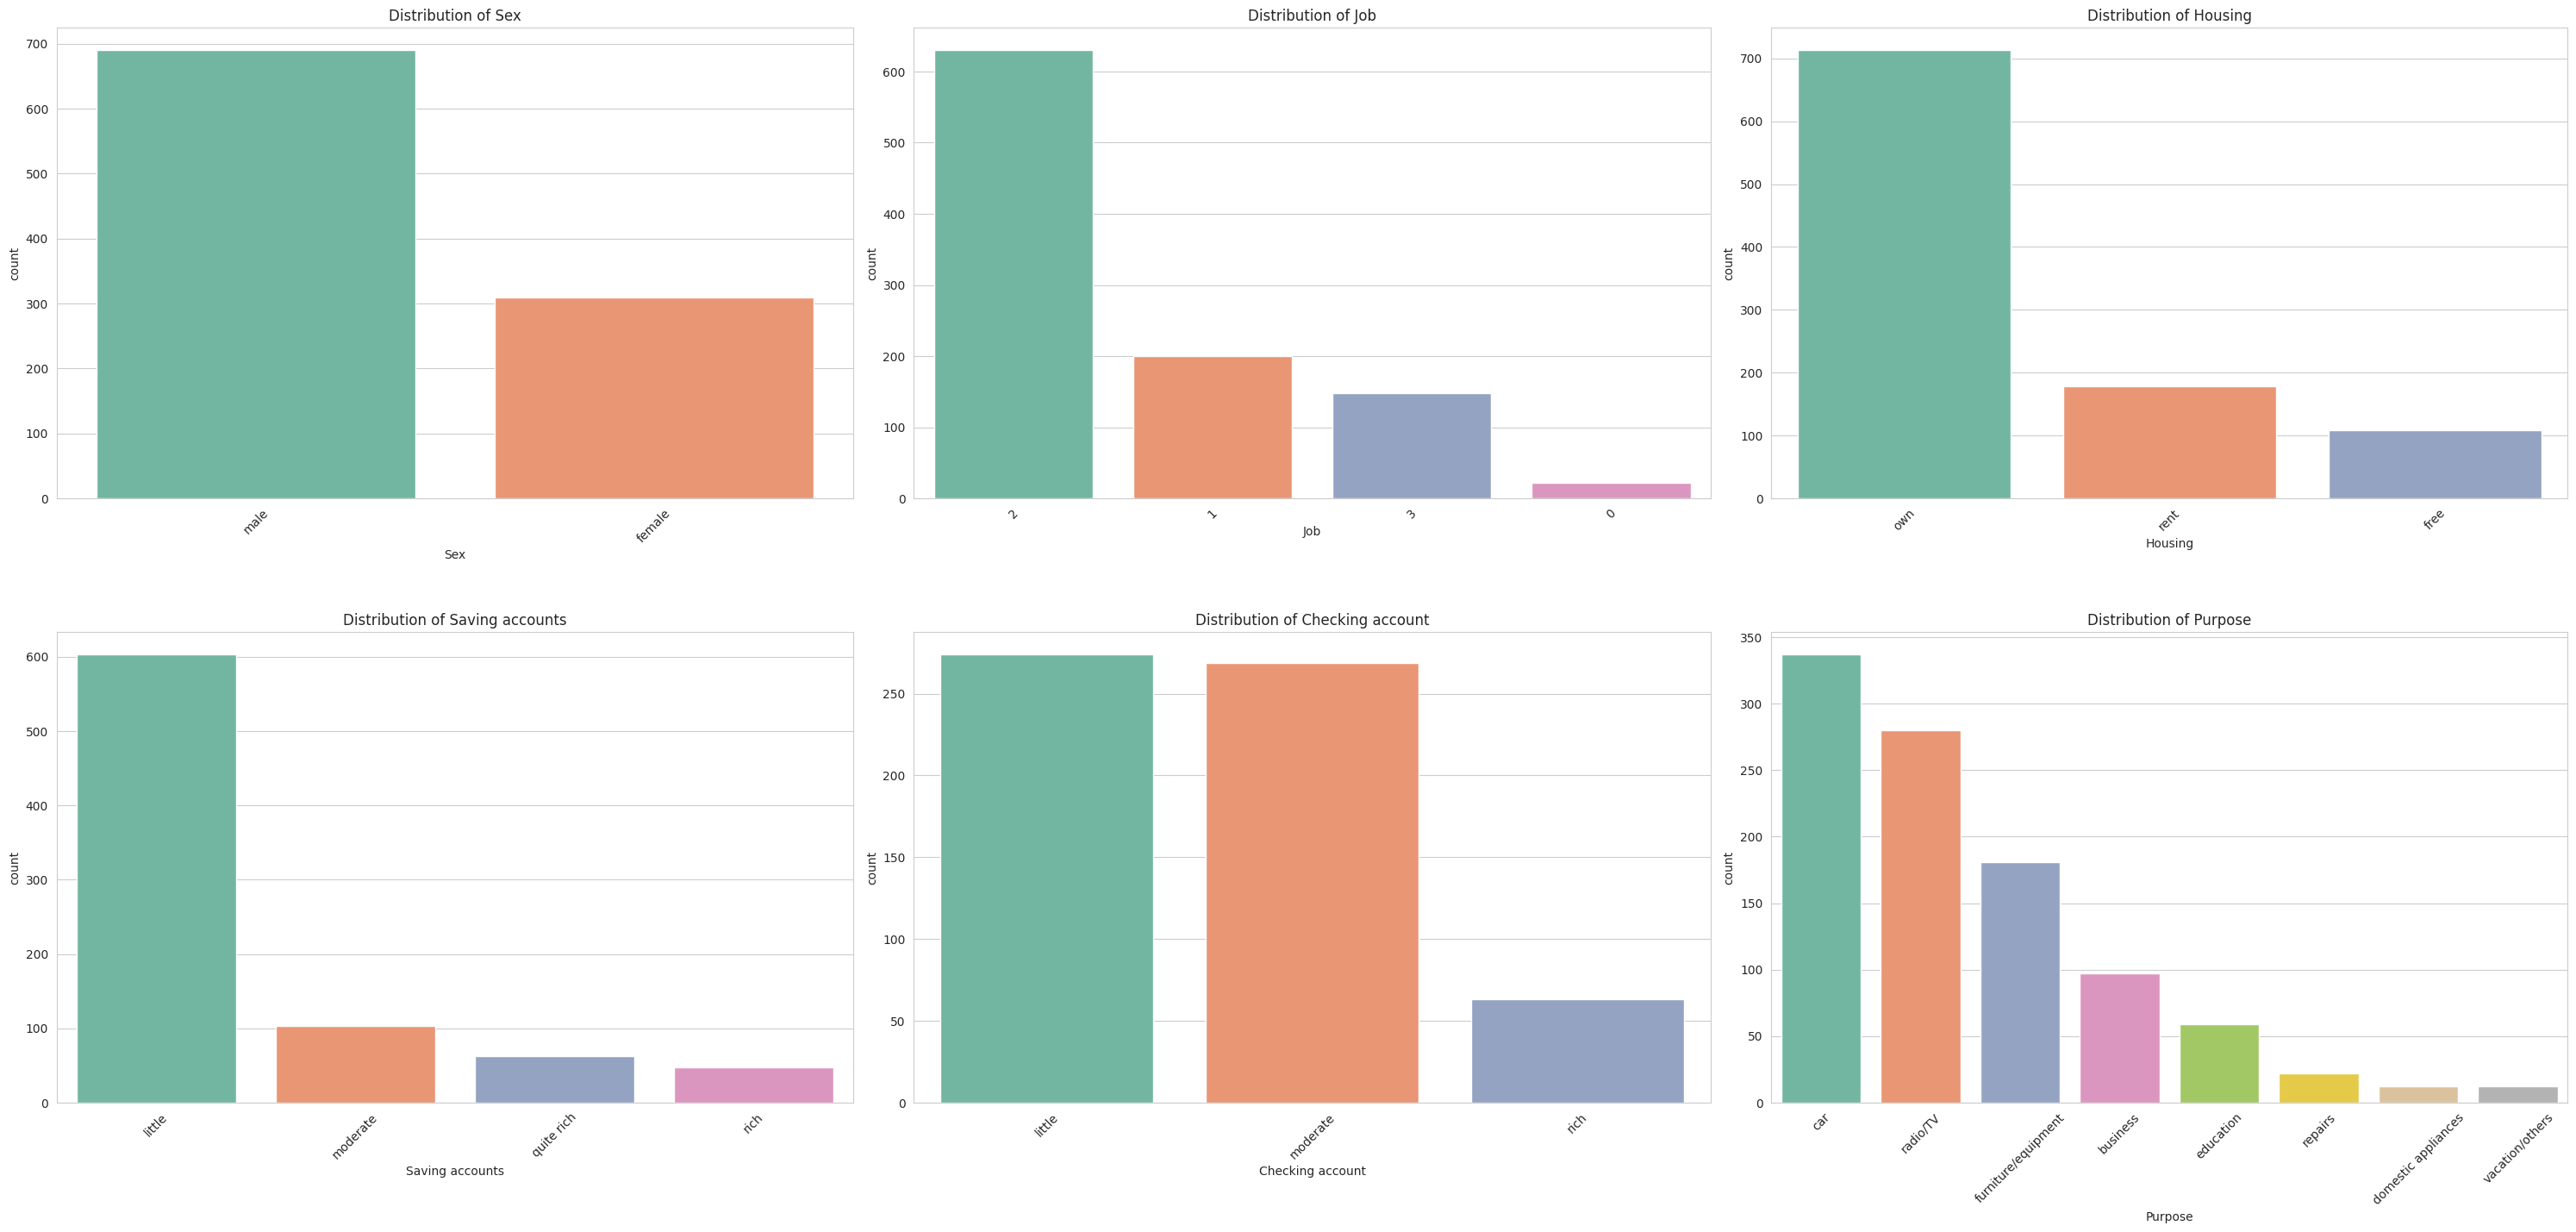

In [37]:
plt.figure(figsize=(30, 20))
for i, col in enumerate(categorical_cols):
  plt.subplot(3, 3, i+1)
  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)
  plt.title(f"Distribution of {col}")
  plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [40]:
corr = df[["Age", "Job", "Credit amount", "Duration"]].corr()

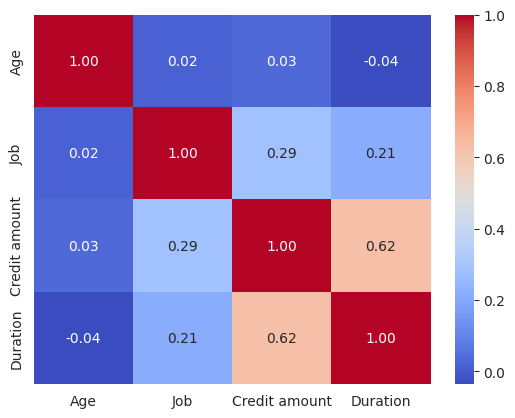

In [41]:
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [42]:
df.groupby("Job")["Credit amount"].mean()

,Credit amount
Job,
0,2745.136364
1,2358.520000
2,3070.965079
3,5435.493243


In [43]:
df.groupby("Sex")["Credit amount"].mean()

,Credit amount
Sex,
female,2877.774194
male,3448.040580


In [45]:
pd.pivot_table(df, values="Credit amount", index="Housing", columns="Purpose")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4931.800000,5834.181818,NaN,4387.266667,4100.181818,2417.333333,2750.666667,7227.250
own,3800.592105,3329.949772,1546.5,2198.647059,3107.459016,2540.493392,2866.000000,8700.375
rent,5614.125000,3487.968254,1255.5,2931.000000,2727.354167,2199.763158,1522.000000,NaN


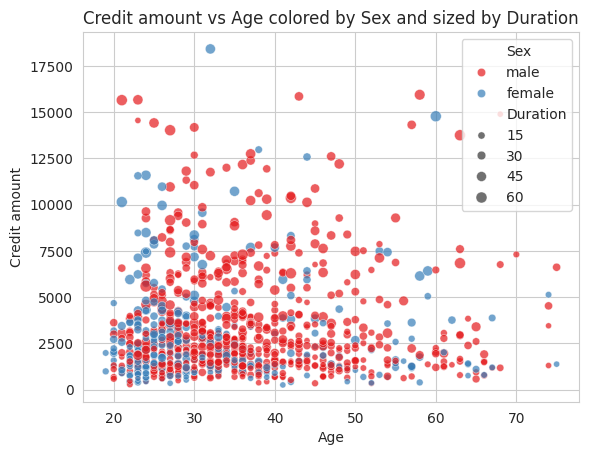

In [47]:
sns.scatterplot(data=df, x="Age", y="Credit amount", hue="Sex", size="Duration", alpha=0.7, palette="Set1")
plt.title("Credit amount vs Age colored by Sex and sized by Duration")
plt.show()

/tmp/ipython-input-163/3667459709.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Saving accounts", y="Credit amount", palette="Pastel1")


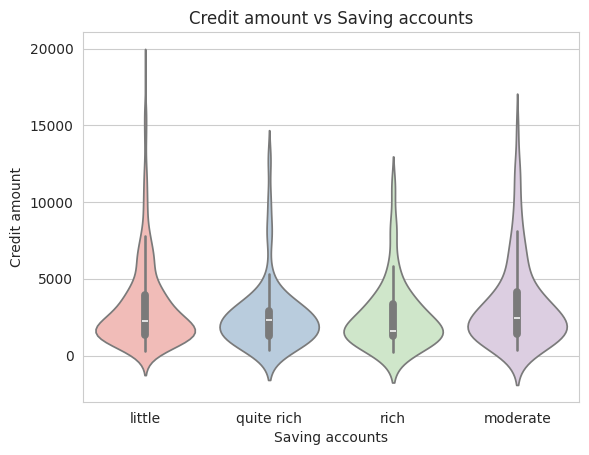

In [50]:
sns.violinplot(data=df, x="Saving accounts", y="Credit amount", palette="Pastel1")
plt.title("Credit amount vs Saving accounts")
plt.show()

In [51]:
df["Risk"].value_counts(normalize=True)*100

,proportion
Risk,
good,70.0
bad,30.0


/tmp/ipython-input-163/2966892027.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Risk", y=col, palette="Pastel2")
/tmp/ipython-input-163/2966892027.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Risk", y=col, palette="Pastel2")
/tmp/ipython-input-163/2966892027.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Risk", y=col, palette="Pastel2")


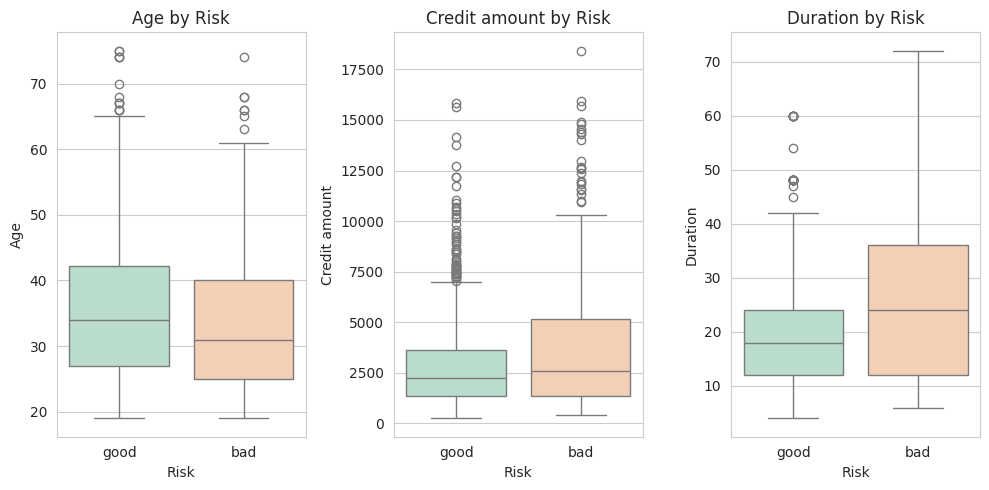

In [55]:
plt.figure(figsize=(10, 5))
for i, col in enumerate(["Age", "Credit amount", "Duration"]):
  plt.subplot(1, 3, i+1)
  sns.boxplot(data=df, x="Risk", y=col, palette="Pastel2")
  plt.title(f"{col} by Risk")

plt.tight_layout()
plt.show()

In [57]:
df.groupby("Risk")[["Age", "Credit amount", "Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,33.963333,3938.126667,24.860000
good,36.224286,2985.457143,19.207143


In [58]:
categorical_cols

['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

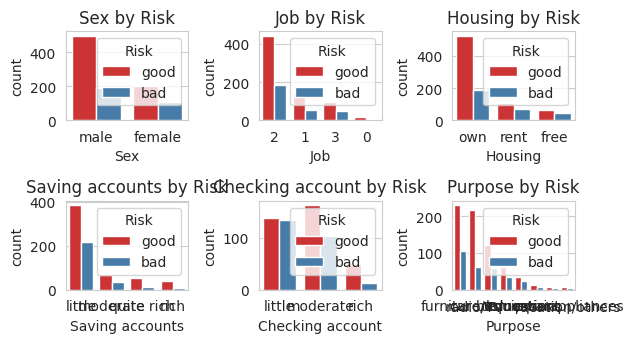

In [59]:
for i, col in enumerate(categorical_cols):
  plt.subplot(3, 3, i+1)
  sns.countplot(data=df, x=col, hue="Risk", palette="Set1", order=df[col].value_counts().index)
  plt.title(f"{col} by Risk")

plt.tight_layout()
plt.show()

In [60]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [61]:
features = ["Age", "Sex", "Job", "Housing", "Saving accounts", "Checking account", "Credit amount", "Duration", "Purpose"]

In [62]:
target="Risk"

In [63]:
df_model=df[features + [target]].copy()

In [64]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [65]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [66]:
cat_cols=df_model.select_dtypes(include="object").columns.drop("Risk")

In [67]:
le_dict={}

In [68]:
cat_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose'], dtype='object')

In [69]:
for cols in cat_cols:
  le=LabelEncoder()
  df_model[cols]=le.fit_transform(df_model[cols])
  le_dict[cols]=le
  joblib.dump(le, f"{cols}_encoder.pkl")

In [70]:
le_target=LabelEncoder()

In [71]:
target

'Risk'

In [73]:
df_model[target]=le_target.fit_transform(df_model[target])

In [74]:
df_model[target]

,Risk
0,1
1,0
2,1
3,1
4,0
...,...
995,1
996,1
997,1
998,0


In [75]:
df_model[target].value_counts()

,count
Risk,
1,700
0,300


In [76]:
joblib.dump(le_target, "target_encoder.pkl")

['target_encoder.pkl']

In [77]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,4,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,3,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0


In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X=df_model.drop(target, axis=1)

In [80]:
y= df_model[target]

In [81]:
X

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,4,0,1169,6,5
1,22,0,2,1,0,1,5951,48,5
2,49,1,1,1,0,3,2096,12,3
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1
...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,3,1736,12,4
996,40,1,3,1,0,0,3857,30,1
997,38,1,2,1,0,3,804,12,5
998,23,1,2,0,0,0,1845,45,5


In [82]:
target

'Risk'

In [83]:
y

,Risk
0,1
1,0
2,1
3,1
4,0
...,...
995,1
996,1
997,1
998,0


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [85]:
X_train.shape

(800, 9)

In [86]:
X_test.shape

(200, 9)

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [109]:
def train_model(model, param_grid, X_train, y_train, X_test, y_test):
  grid =GridSearchCV(model,param_grid, cv=5, scoring="accuracy")
  grid.fit(X_train, y_train)
  best_model=grid.best_estimator_

  y_test_pred=best_model.predict(X_test)
  acc=accuracy_score(y_test, y_test_pred)
  return best_model, acc, grid.best_params_

In [110]:
dt = DecisionTreeClassifier(random_state=1, class_weight="balanced")
dt_param_grid={
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1,2,4]
}

In [111]:
best_dt, acc_dt, params_dt = train_model(dt, dt_param_grid, X_train, y_train, X_test, y_test)

In [112]:
print("Decision Tree Accuracy:", acc_dt)

Decision Tree Accuracy: 0.71


In [113]:
print("Best Parameters:", params_dt)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [114]:
rf=RandomForestClassifier(random_state=1, class_weight="balanced", n_jobs=-1)

In [116]:
rf_param_grid={
    "n_estimators": [100, 200],
    "max_depth": [5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1,2,4]
}

In [120]:
best_rf, acc_rf, params_rf = train_model(rf, rf_param_grid, X_train, y_train, X_test, y_test)

In [121]:
print("random forest Accuracy", acc_rf)

random forest Accuracy 0.77


In [122]:
print("Best params", params_rf)

Best params {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [123]:
et= ExtraTreesClassifier(random_state=1, class_weight="balanced", n_jobs=-1)

In [124]:
et_param_grid={
    "n_estimators": [100, 200],
    "max_depth": [5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1,2,4]
}

In [125]:
best_et, acc_et, params_et = train_model(et, et_param_grid, X_train, y_train, X_test, y_test)

In [126]:
print("Extra trees accuracy", acc_et)

Extra trees accuracy 0.755


In [127]:
print("Best params:", params_et)

Best params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [128]:
xgb= XGBClassifier(random_state=1, scale_pos_weight= (y_train==0).sum()/ (y_train==1).sum(), use_label_encoder=False, eval_metric="logloss")

In [129]:
xgb_params_grid={
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.7, 1],
    "colsample_bytree": [0.7, 1]

}

In [133]:
best_xgb, acc_xgb, params_xgb = train_model(xgb, xgb_params_grid, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [18:13:42] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [18:13:42] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [18:13:42] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [18:13:42] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:

In [134]:
print("XGB accuracy", acc_xgb)

XGB accuracy 0.74


In [135]:
print("Best params", params_xgb)

Best params {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1}


In [136]:
best_et.predict(X_test)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1])

In [137]:
joblib.dump(best_et, "extra_trees_credit_model.pkl")

['extra_trees_credit_model.pkl']

In [139]:
import pandas as pd
import joblib

In [140]:
# Model and encoders load
model = joblib.load("extra_trees_credit_model.pkl")
encoders = {col: joblib.load(f"{col}_encoder.pkl") for col in ['Sex', 'Housing', 'Saving accounts', 'Checking account']}

In [145]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 51.2 MB/s eta 0:00:00


In [146]:
import streamlit as st
st.title("Credit Risk Prediction App")
st.write("Enter applicant information to predict if the credit risk is good or bad.")

2026-03-01 18:24:51.043 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-03-01 18:24:51.300 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2026-03-01 18:24:51.303 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-03-01 18:24:51.306 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-03-01 18:24:51.315 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-03-01 18:24:51.317 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-03-01 18:24:51.319 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [147]:
age = st.number_input("Age", min_value=18, max_value=80, value=30)
sex = st.selectbox("Sex", ["male", "female"])
job = st.number_input("Job (0-3)", min_value=0, max_value=3, value=1)
housing = st.selectbox("Housing", ["own", "rent", "free"])
saving_accounts = st.selectbox("Saving Accounts", ["little", "moderate", "quite rich", "rich"])
checking_account = st.selectbox("Checking Account", ["little", "moderate", "rich"])
credit_amount = st.number_input("Credit Amount", min_value=0, value=1000)
duration = st.number_input("Duration (months)", min_value=1, value=12)

2026-03-01 18:25:00.268 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-03-01 18:25:00.269 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-03-01 18:25:00.270 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-03-01 18:25:00.272 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-03-01 18:25:00.273 Session state does not function when running a script without `streamlit run`
2026-03-01 18:25:00.274 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-03-01 18:25:00.276 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-03-01 18:25:00.277 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-03-01 18:25

In [148]:
age = st.number_input("Age", min_value=18, max_value=80, value=30)
sex = st.selectbox("Sex", ["male", "female"])
job = st.number_input("Job (0-3)", min_value=0, max_value=3, value=1)
housing = st.selectbox("Housing", ["own", "rent", "free"])
saving_accounts = st.selectbox("Saving Accounts", ["little", "moderate", "quite rich", "rich"])
checking_account = st.selectbox("Checking Account", ["little", "moderate", "rich"])
credit_amount = st.number_input("Credit Amount", min_value=0, value=1000)
duration = st.number_input("Duration (months)", min_value=1, value=12)

2026-03-01 18:25:13.320 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-03-01 18:25:13.322 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-03-01 18:25:13.323 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-03-01 18:25:13.324 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-03-01 18:25:13.326 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-03-01 18:25:13.328 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-03-01 18:25:13.328 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-03-01 18:25:13.331 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [149]:
if st.button("Predict"):
    prediction = model.predict(input_df)
    result = "Good" if prediction[0] == 1 else "Bad"
    st.subheader(f"The predicted credit risk is: {result}")

2026-03-01 18:25:23.976 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-03-01 18:25:23.978 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-03-01 18:25:23.980 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-03-01 18:25:23.982 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-03-01 18:25:23.983 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-03-01 18:25:23.984 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
